# SEABORN

It is the statistical plotting library built on top of matplotlib

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("Seaborn Version: {}".format(sns.__version__))
print("Pandas Version: {}".format(pd.__version__))
print("Numpy Version: {}".format(np.__version__))

Seaborn Version: 0.10.1
Pandas Version: 1.0.5
Numpy Version: 1.18.5


## Distribution plots

In [2]:
df =  sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## To get distribution of single column of dataframe
Histogram : x_axis denotes the column, y_axis denotes the count

<AxesSubplot:xlabel='tip'>

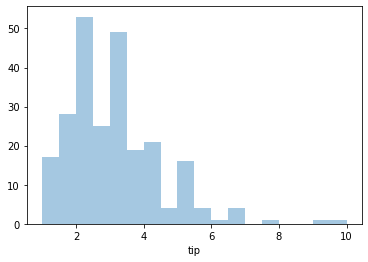

In [3]:
sns.distplot(df['tip'], kde=False)

<AxesSubplot:xlabel='total_bill'>

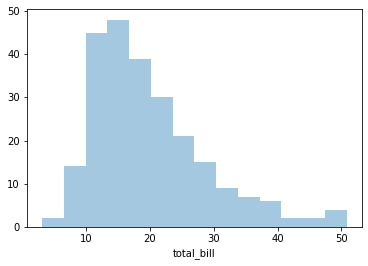

In [4]:
sns.distplot(df['total_bill'], kde=False)

<AxesSubplot:xlabel='tip'>

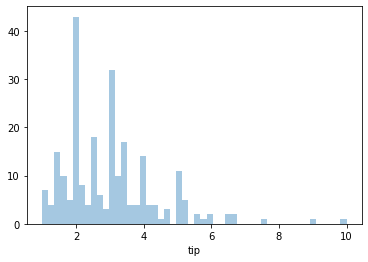

In [5]:
sns.distplot(df['tip'], kde=False, bins=50)

## Combined distribution (jointplot)

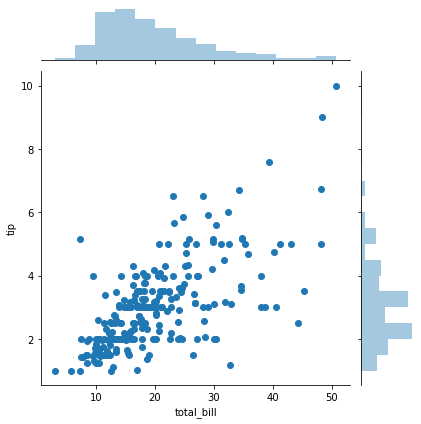

In [6]:
sns.jointplot(x='total_bill',y='tip',data=df)

It consists of two distribution plots and one combined scatter plot in between.  
To change the appearance of the points in the plot between kind parameter can be used.

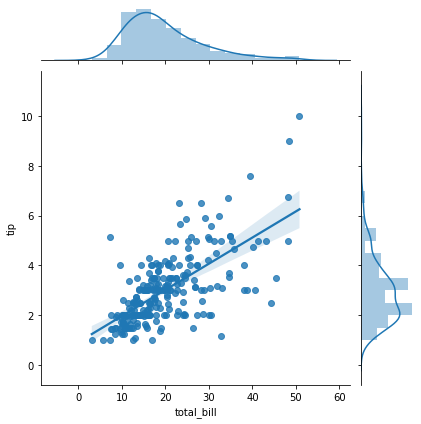

In [7]:
sns.jointplot(x='total_bill',y='tip',data=df, kind='reg')

Seaborn draws linear regression line - the line which best fits data points with minimum error

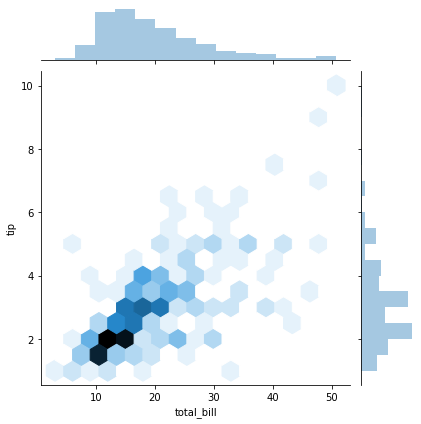

In [8]:
sns.jointplot(x='total_bill',y='tip',data=df, kind='hex')

This is hexagon representation of the data distribution. Dark colored hexagon indicates that many data points are clustered at that point.

## pairplot
This will give an overview of how each numerical column is related to the other. Pairwise comparison between numerical columns

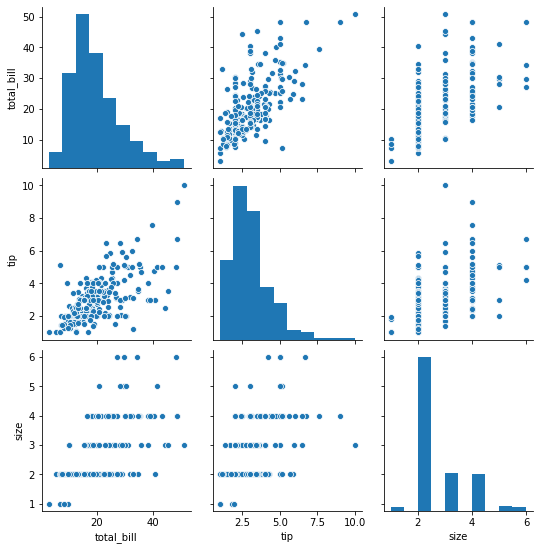

In [9]:
sns.pairplot(df)

Categorical data view Hue command can be used for viewing categorical data. It is give distribution with respect to the variable in different colors

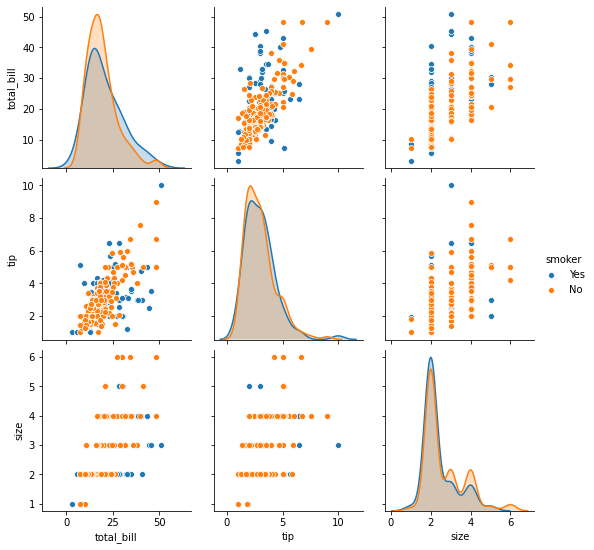

In [10]:
sns.pairplot(df, hue='smoker')

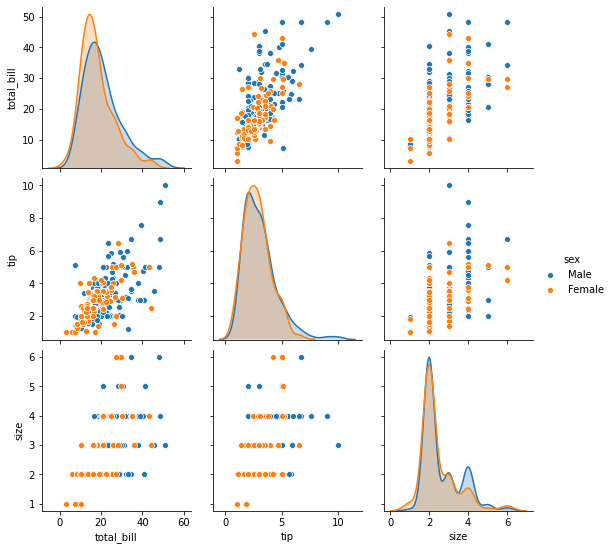

In [11]:
sns.pairplot(df, hue='sex')

## Kernel Density Estimation Plot
Reference: https://en.wikipedia.org/wiki/Kernel_density_estimation

This is basically the summation of all normal distributions of a particular point.  
Summation of all normal distributions will give that curve drawn over the histogram

<AxesSubplot:xlabel='tip'>

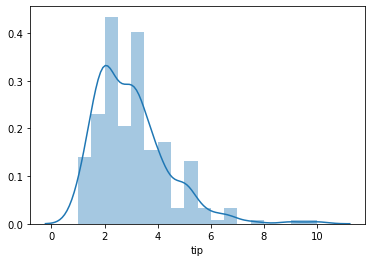

In [12]:
sns.distplot(df['tip'])

## Countplot
To get number of data points falling under particular category

<AxesSubplot:xlabel='sex', ylabel='count'>

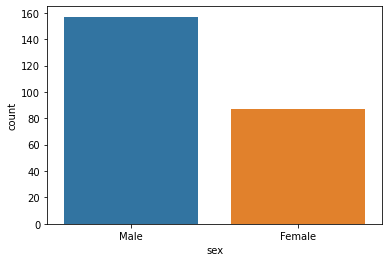

In [13]:
sns.countplot(x='sex', data=df)

## Matrix Plots

In [14]:
df_1 = sns.load_dataset('flights')
df_1.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [15]:
data = df.corr()
data

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


## HeatMap

<AxesSubplot:>

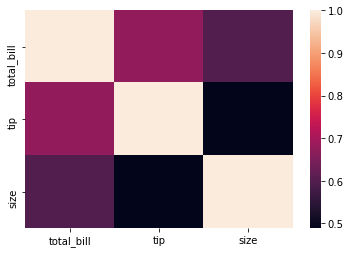

In [16]:
sns.heatmap(data)

<AxesSubplot:>

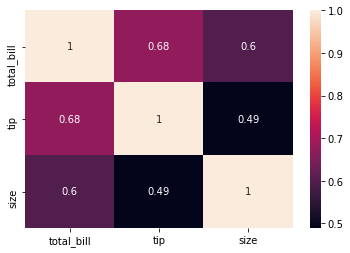

In [17]:
sns.heatmap(data, annot=True)

In [18]:
#Creating matrix table for flight data
new_df_1 = df_1.pivot_table(index='month', columns='year', values='passengers')
new_df_1

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

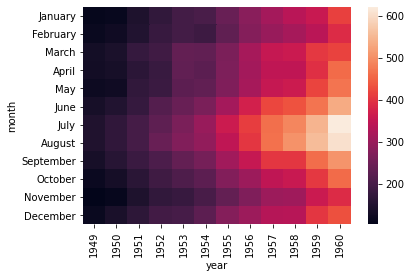

In [19]:
sns.heatmap(new_df_1)

<AxesSubplot:xlabel='year', ylabel='month'>

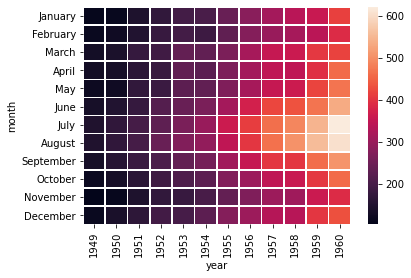

In [20]:
sns.heatmap(new_df_1, linewidth='0.6', linecolor='white')

## Clustermap
Cluster information to show columns and rows that are similar to each other

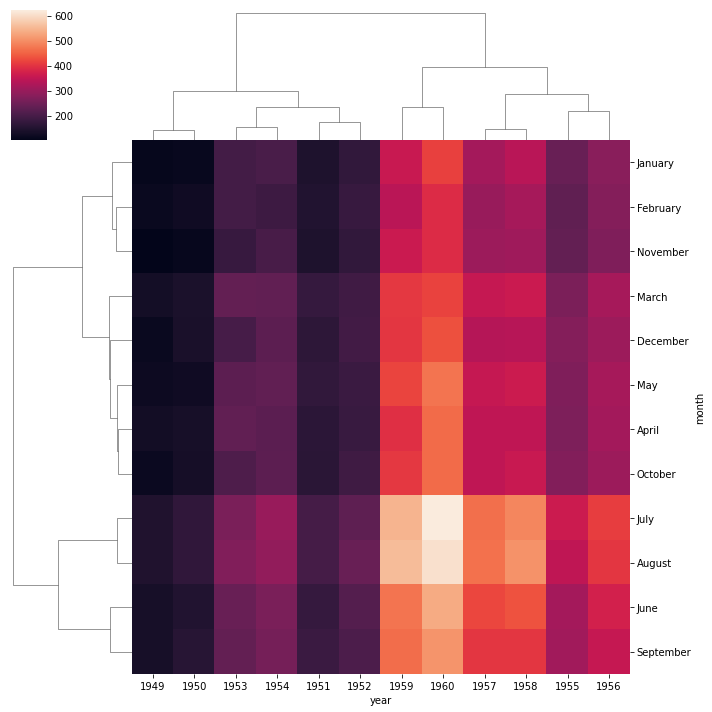

In [21]:
sns.clustermap(new_df_1)

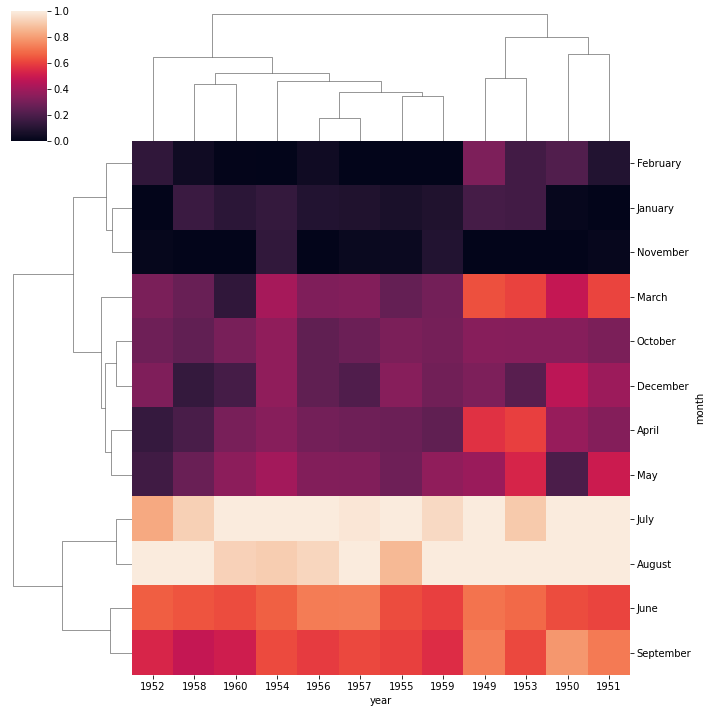

In [22]:
sns.clustermap(new_df_1, standard_scale=1)

## Grids
Grid plot gives more control over how we want to visualize the data

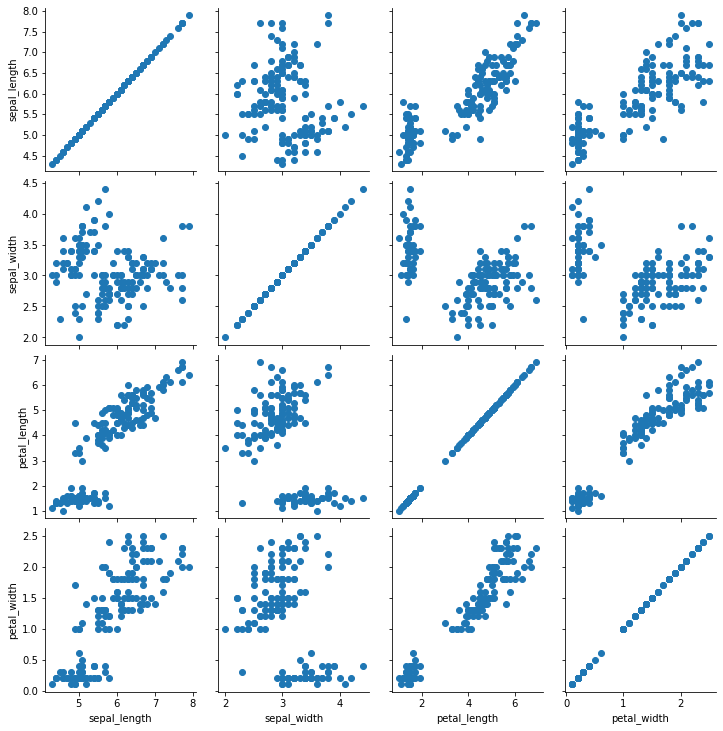

In [23]:
df_2 = sns.load_dataset('iris')
#This will give us an empty grid above which we can apply any types of plot
grid = sns.PairGrid(df_2)
#scatter plot over grid
grid.map(plt.scatter)

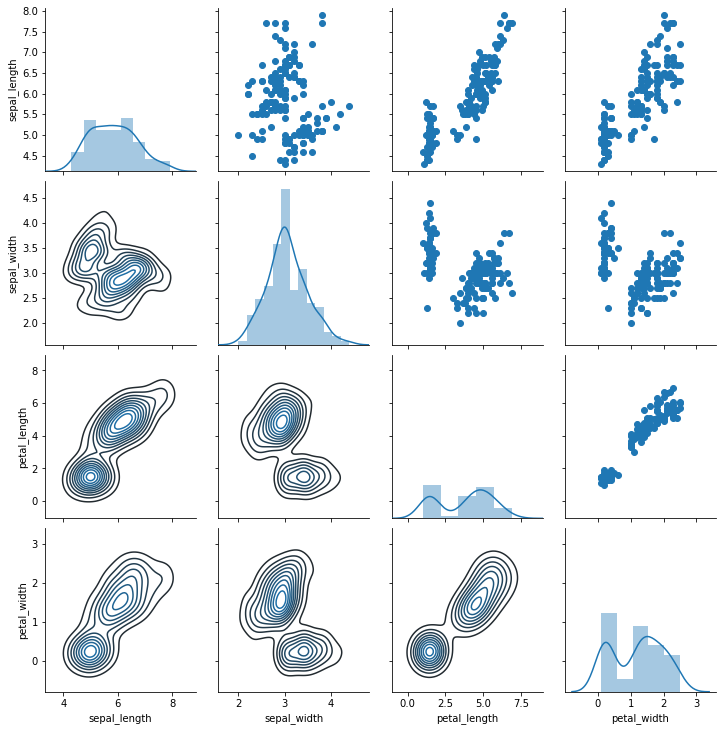

In [24]:
#This will give us an empty grid above which we can apply any types of plot
grid = sns.PairGrid(df_2)
#scatter plot over grid
grid.map_diag(sns.distplot)
grid.map_upper(plt.scatter)
grid.map_lower(sns.kdeplot)